In [ ]:
import numpy as np
import math

class BanditArm:
    def __init__(self, p):
        self.p = p  # Probability of reward
        self.count = 0  # Number of times this arm was chosen
        self.value = 0  # Estimated value of this arm
        self.total_reward = 0  # total reward collected from this arm

    def pull(self):
        # Simulate pulling the arm
        if(np.random.random() > self.p[0]):
            return -self.p[3]
        else:
            s=0
            for i in range(10):
                if(np.random.random() <self.p[1]):
                    s+=1
            return s*self.p[2] - self.p[3] - self.p[4]

    def update(self, reward):
        self.count += 1
        # incremental formula
        self.total_reward+=reward
        self.value += (reward - self.value) / self.count

    def ucb_value(self, total_count, c=2):
        if self.count == 0:
            return float('inf')  # to ensure that each arm is selected at least once
        else:
            return self.value + c * math.sqrt(math.log(total_count) / self.count)



In [ ]:
class egreedy_alg:
    def __init__(self, probabilities, epsilon=0.1):
        self.arms = [BanditArm(p) for p in probabilities]
        self.epsilon = epsilon

    def choose_arm(self):
        if np.random.random() > self.epsilon:
            # Exploit: Choose the best arm
            return np.argmax([arm.value for arm in self.arms])
        else:
            # Explore: Choose an arm randomly
            return np.random.choice(len(self.arms))

    def update(self, chosen_arm, reward):
        self.arms[chosen_arm].update(reward)

    def run(self, num_trials):
        history = []

        for _ in range(num_trials):
            chosen_arm = self.choose_arm()
            reward = self.arms[chosen_arm].pull()
            self.update(chosen_arm, reward)
            history.append((chosen_arm, reward))

        return history


# Example usage:
probabilities = [(0.8,0.7,27,2,80),(0.3,0.7,27,14,80),(0.5,0.7,27,10,80),(0.5,0.5,26,2,60),(0.5,0.5,26,14,60),(0.6,0.5,26,10,60),(0.2,0.3,25,2,30),(0.7,0.3,25,14,30),(0.8,0.3,25,10,30)]  # Probabilities of the 9 arms
epsilon = 0.1  # Set the level of exploration
egreedy = egreedy_alg(probabilities, epsilon)


history = egreedy.run(480)  # Run the bandit for 1000 trials
print(history)  # Print the history of chosen arms and rewards


for BanditArm in egreedy.arms:
    print(BanditArm.value)


[(3, 68), (3, -2), (3, 94), (1, -14), (3, 42), (3, 16), (3, -2), (1, -14), (3, 68), (3, -2), (3, 16), (3, 68), (3, -2), (3, 120), (1, 122), (2, -10), (3, 68), (3, -2), (3, -2), (3, 42), (8, 10), (3, 68), (3, -2), (3, -2), (3, 16), (3, -2), (7, 31), (3, -2), (1, -14), (7, 6), (3, -2), (3, 94), (3, 16), (3, -2), (3, -2), (3, 16), (3, 94), (3, -2), (3, 94), (3, 68), (3, 94), (3, -10), (7, -14), (3, 16), (3, -2), (8, -40), (3, -2), (3, -10), (3, 16), (3, 16), (3, 68), (3, 94), (3, 94), (3, 68), (3, 120), (3, 68), (3, 16), (3, -2), (3, 42), (5, -10), (5, -10), (3, -2), (3, -2), (3, 68), (8, 110), (3, 146), (3, 120), (3, -2), (3, -2), (3, -2), (3, -2), (3, 68), (3, 42), (3, -2), (3, -2), (3, -2), (3, -2), (3, -2), (3, 120), (3, -2), (3, -2), (3, -2), (3, 42), (3, -2), (3, -2), (3, -2), (3, -2), (3, -2), (3, -2), (3, 94), (3, 146), (3, -2), (3, -2), (3, 146), (3, -2), (3, 94), (3, -2), (3, -10), (3, -2), (3, -2), (3, -2), (3, -2), (3, -2), (3, 68), (3, -2), (3, -2), (3, -2), (3, -2), (3, 42),

In [ ]:
class UCB_alg():
    def __init__(self, probabilities, epsilon=0.1):
        self.arms = [BanditArm(p) for p in probabilities]
        self.epsilon = epsilon

    def choose_arm(self):
        total_count = sum(arm.count for arm in self.arms)
        return np.argmax([arm.ucb_value(total_count) for arm in self.arms])

    def update(self, chosen_arm, reward):
        self.arms[chosen_arm].update(reward)

    def run(self, num_trials):
        history = []

        for _ in range(num_trials):
            chosen_arm = self.choose_arm()
            reward = self.arms[chosen_arm].pull()
            self.update(chosen_arm, reward)
            history.append((chosen_arm, reward))

        return history

# Example usage:
probabilities = [(0.8,0.7,27,2,80),(0.3,0.7,27,14,80),(0.5,0.7,27,10,80),(0.5,0.5,26,2,60),(0.5,0.5,26,14,60),(0.6,0.5,26,10,60),(0.2,0.3,25,2,30),(0.7,0.3,25,14,30),(0.8,0.3,25,10,30)]  # Probabilities of the 9 arms
epsilon = 0.1  # Set the level of exploration
UCB = UCB_alg(probabilities, epsilon)


history = UCB.run(5000)  # Run the bandit for 10 years
print(history)  # Print the history of chosen arms and rewards


for BanditArm in UCB.arms:
  print(BanditArm.value)

[(0, 134), (1, -14), (2, -10), (3, -10), (4, -14), (5, -10), (6, -2), (7, -19), (8, -10), (0, 80), (0, 188), (0, 161), (0, 80), (0, 107), (0, 161), (0, 134), (0, -2), (0, 80), (0, 53), (0, -2), (0, 107), (0, 107), (0, -2), (0, 134), (0, 134), (0, 107), (0, 53), (0, 53), (0, 134), (0, 107), (0, -2), (0, 161), (0, -2), (0, 134), (0, 134), (0, -2), (0, -2), (0, 134), (0, 134), (0, -2), (0, 80), (0, 80), (0, 107), (0, -2), (0, 161), (0, 134), (0, 26), (0, 107), (0, 107), (0, -2), (0, 53), (0, 107), (0, 80), (0, 107), (0, 134), (0, 107), (0, 107), (0, -2), (0, 134), (0, 188), (0, -2), (0, 107), (0, 80), (0, -2), (0, -2), (0, 80), (0, 107), (0, 26), (0, 107), (0, 107), (0, 161), (0, 107), (0, 80), (0, 80), (0, 134), (0, 107), (0, 53), (0, -2), (0, -2), (0, -2), (0, 53), (0, 53), (0, 80), (0, 80), (0, 53), (0, -2), (0, -2), (0, 107), (0, 80), (0, 134), (0, 161), (0, 107), (0, -2), (0, 134), (0, -2), (0, 80), (0, 80), (0, 53), (0, 80), (0, 134), (0, 107), (0, 161), (0, 107), (0, -2), (0, 80), 

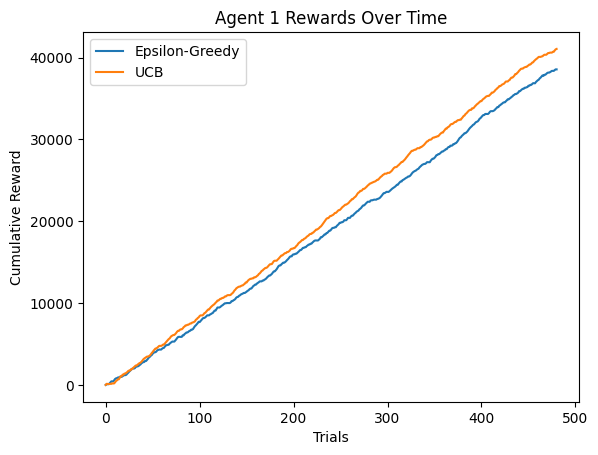

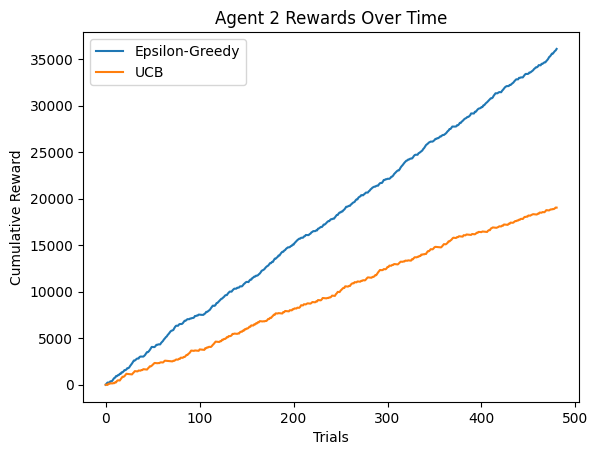

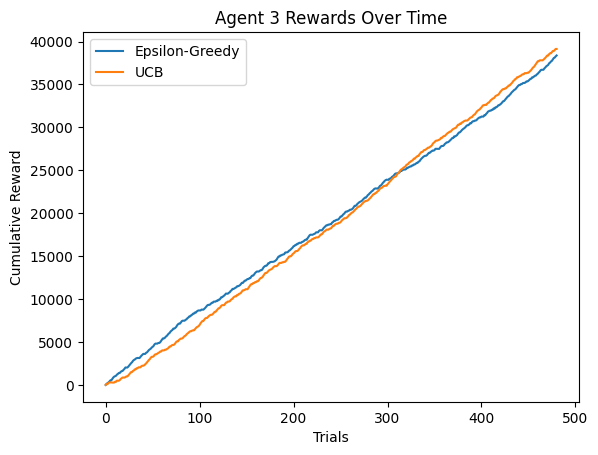

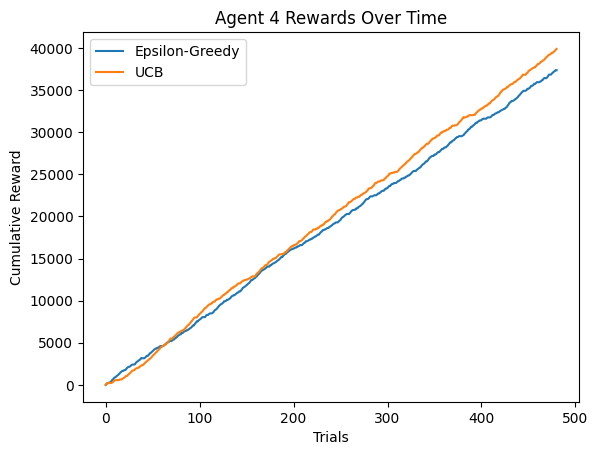

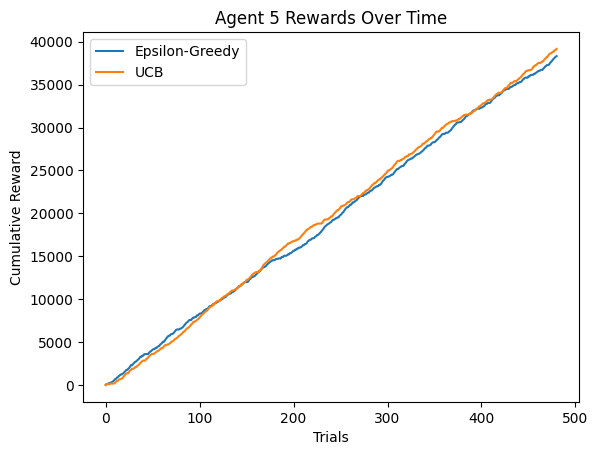

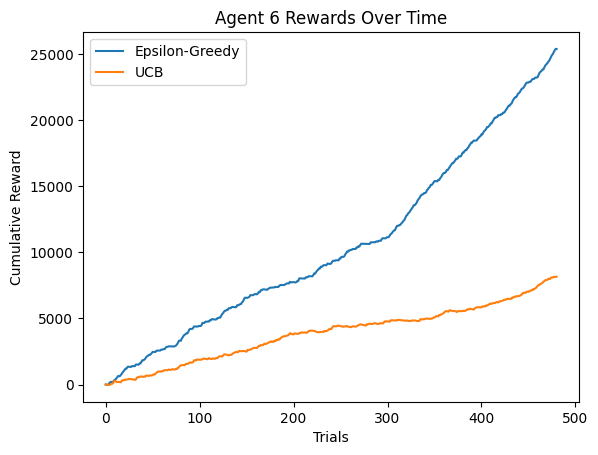

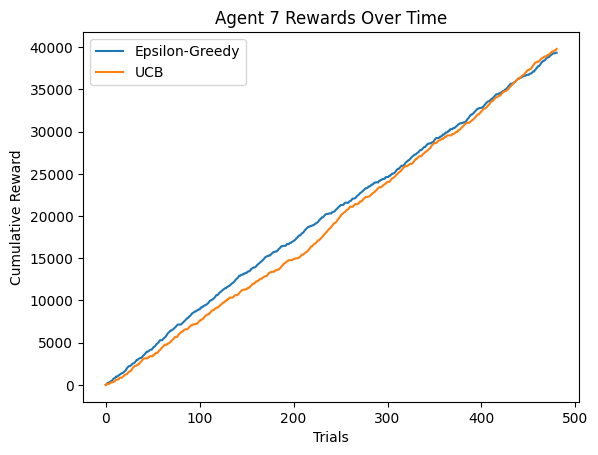

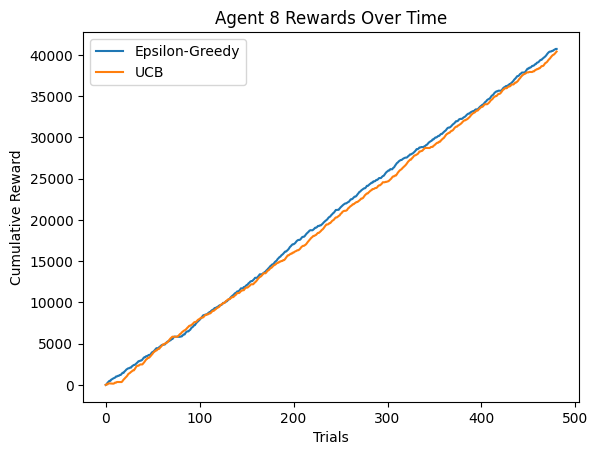

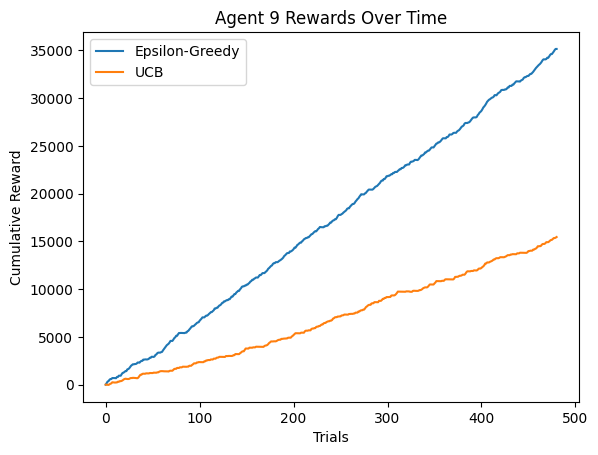

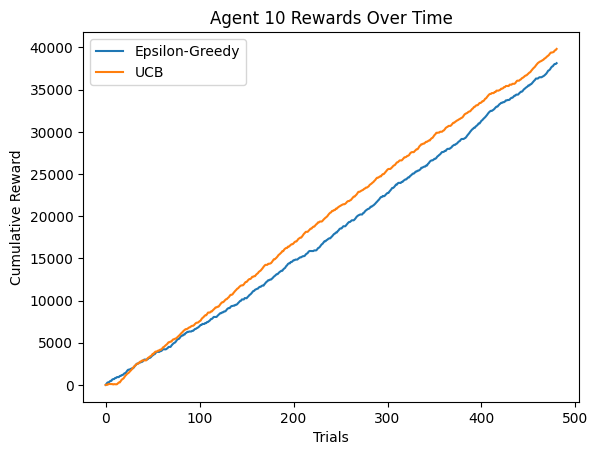

In [ ]:
import matplotlib.pyplot as plt

num_agents = 10
num_trials = 480  # 10 years of experience
probabilities = [(0.8,0.7,27,2,80),(0.3,0.7,27,14,80),(0.5,0.7,27,10,80),(0.5,0.5,26,2,60),(0.5,0.5,26,14,60),(0.6,0.5,26,10,60),(0.2,0.3,25,2,30),(0.7,0.3,25,14,30),(0.8,0.3,25,10,30)]  # Probabilities of the 9 arms
epsilon = 0.1  # Set your epsilon value

for agent in range(num_agents):
    egreedy = egreedy_alg(probabilities, epsilon)
    ucb = UCB_alg(probabilities)

    egreedy_rewards = [0]
    ucb_rewards = [0]

    for trial in range(num_trials):
        # Run a trial for epsilon-greedy
        _, reward = egreedy.run(1)[0]
        egreedy_rewards.append(egreedy_rewards[-1] + reward)

        # Run a trial for UCB
        _, reward = ucb.run(1)[0]
        ucb_rewards.append(ucb_rewards[-1] + reward)

    # Plotting
    plt.figure()

    plt.plot(egreedy_rewards, label='Epsilon-Greedy')
    plt.plot(ucb_rewards, label='UCB')
    plt.title(f'Agent {agent+1} Rewards Over Time')
    plt.xlabel('Trials')
    plt.ylabel('Cumulative Reward')
    plt.legend()

    plt.show()


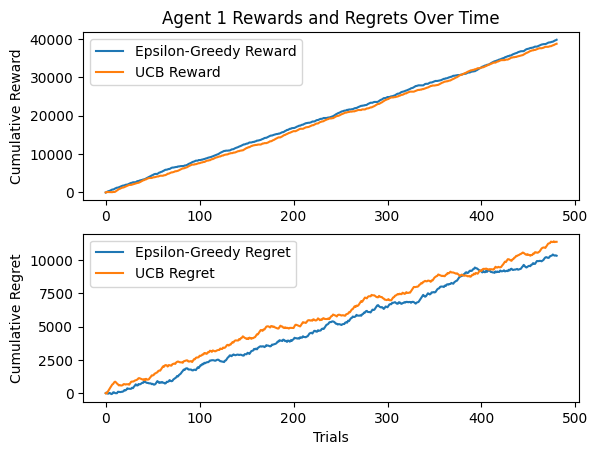

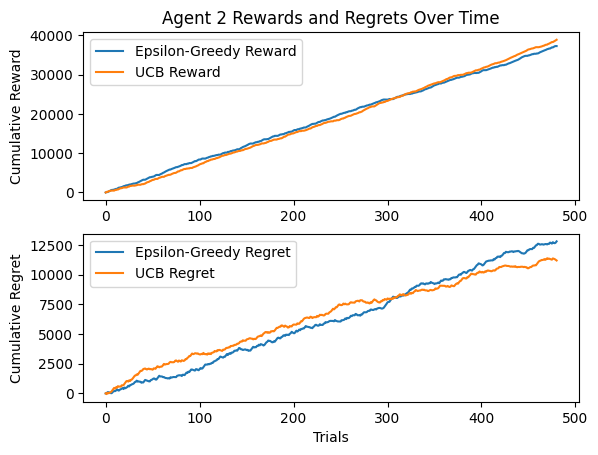

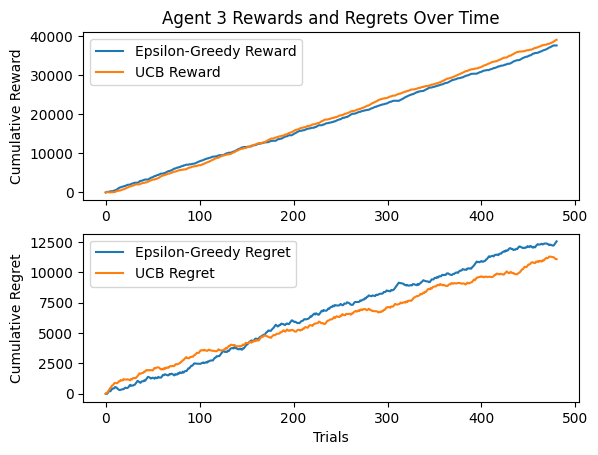

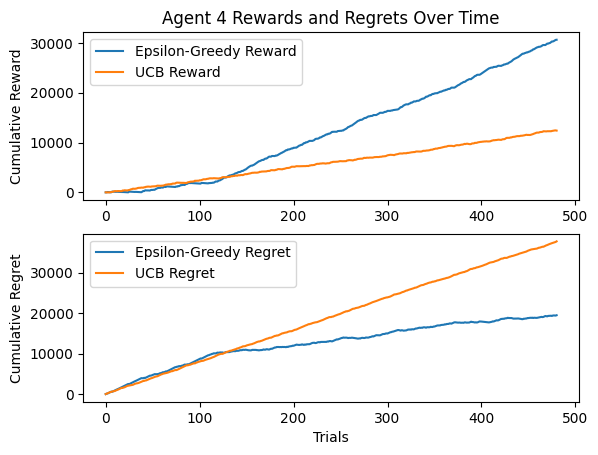

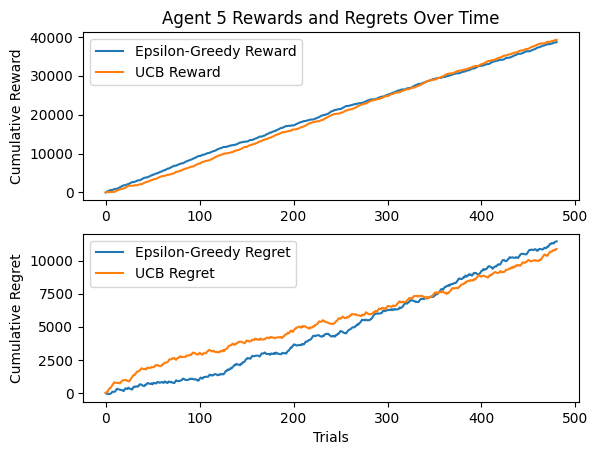

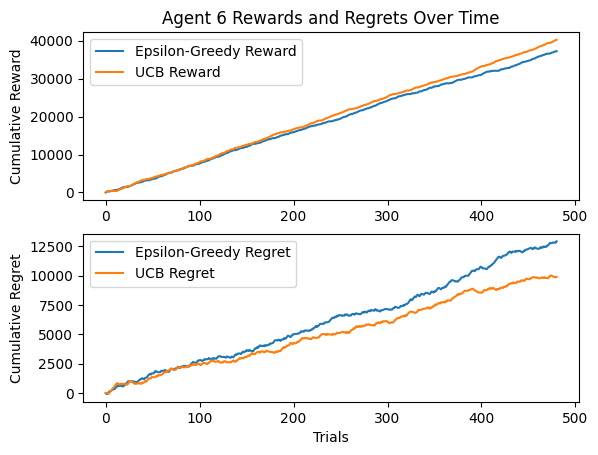

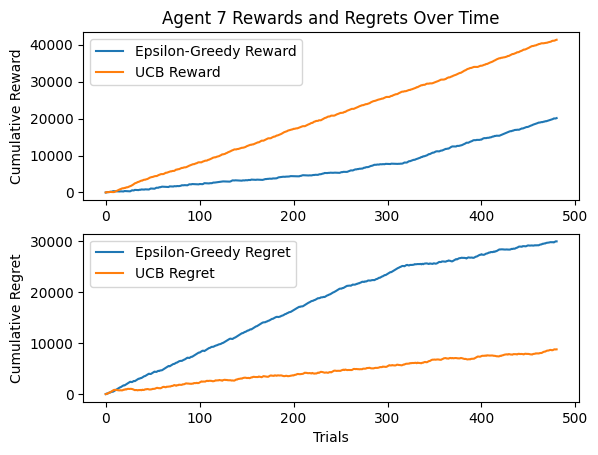

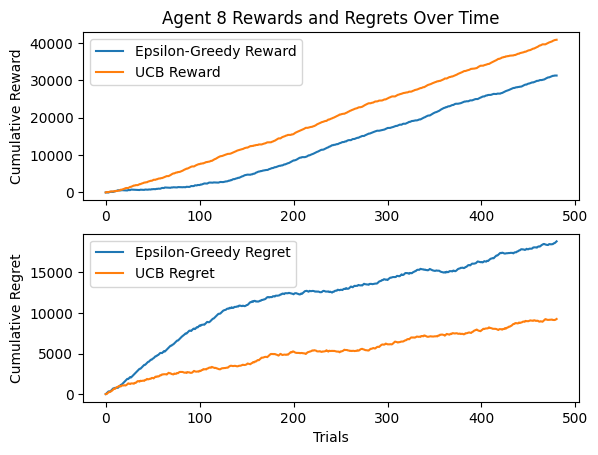

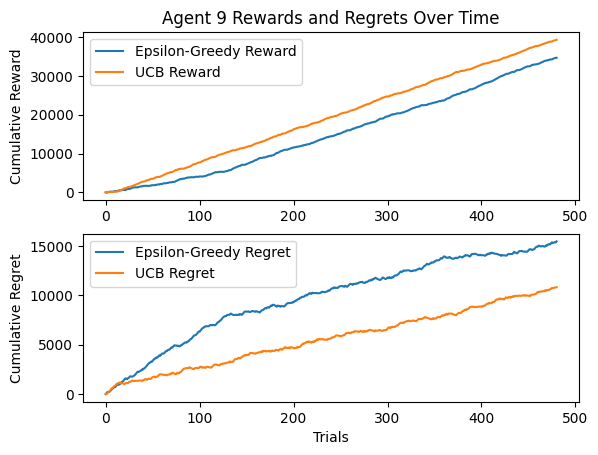

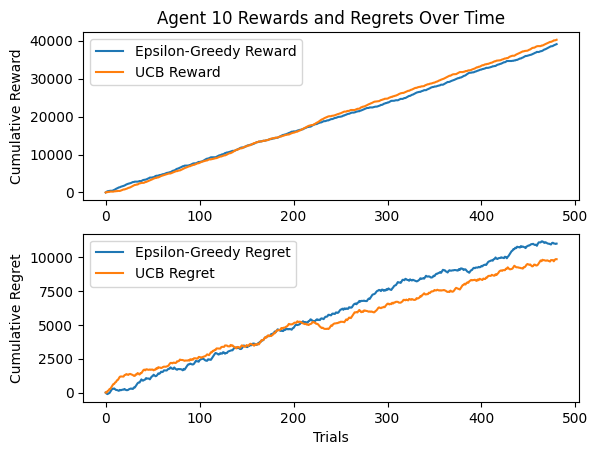

In [ ]:
import matplotlib.pyplot as plt

num_agents = 10
num_trials = 480  # 10 year experience
probabilities = [(0.8,0.7,27,2,80),(0.3,0.7,27,14,80),(0.5,0.7,27,10,80),(0.5,0.5,26,2,60),(0.5,0.5,26,14,60),(0.6,0.5,26,10,60),(0.2,0.3,25,2,30),(0.7,0.3,25,14,30),(0.8,0.3,25,10,30)]  # Probabilities of the 9 arms
epsilon = 0.1  # Set your epsilon value

# Function to calculate the maximum average reward per pull
#def optimal_reward(probabilities):
#    if(np.random.random() > 0.8):
#        return -2
#    else:
#        s=0
#        for i in range(10):
#            if(np.random.random() < 0.7):
#                s+=1
#        return s*27-80-2
# max_reward_per_pull = optimal_reward(probabilities)
max_reward_per_pull = 104.4



for agent in range(num_agents):
    egreedy = egreedy_alg(probabilities, epsilon)
    ucb = UCB_alg(probabilities)

    egreedy_rewards = [0]
    ucb_rewards = [0]
    optimal_rewards = [0]

    egreedy_regrets = [0]
    ucb_regrets = [0]

    for trial in range(num_trials):
        # Update optimal rewards
        optimal_rewards.append(optimal_rewards[-1] + max_reward_per_pull)

        # Epsilon-Greedy
        _, reward = egreedy.run(1)[0]
        egreedy_rewards.append(egreedy_rewards[-1] + reward)
        egreedy_regrets.append(optimal_rewards[-1] - egreedy_rewards[-1])

        # UCB
        _, reward = ucb.run(1)[0]
        ucb_rewards.append(ucb_rewards[-1] + reward)
        ucb_regrets.append(optimal_rewards[-1] - ucb_rewards[-1])

    # Plotting Rewards
    plt.figure()
    plt.subplot(2, 1, 1)
    plt.plot(egreedy_rewards, label='Epsilon-Greedy Reward')
    plt.plot(ucb_rewards, label='UCB Reward')
    plt.title(f'Agent {agent+1} Rewards and Regrets Over Time')
    plt.ylabel('Cumulative Reward')
    plt.legend()

    # Plotting Regrets
    plt.subplot(2, 1, 2)
    plt.plot(egreedy_regrets, label='Epsilon-Greedy Regret')
    plt.plot(ucb_regrets, label='UCB Regret')
    plt.xlabel('Trials')
    plt.ylabel('Cumulative Regret')
    plt.legend()

    plt.show()


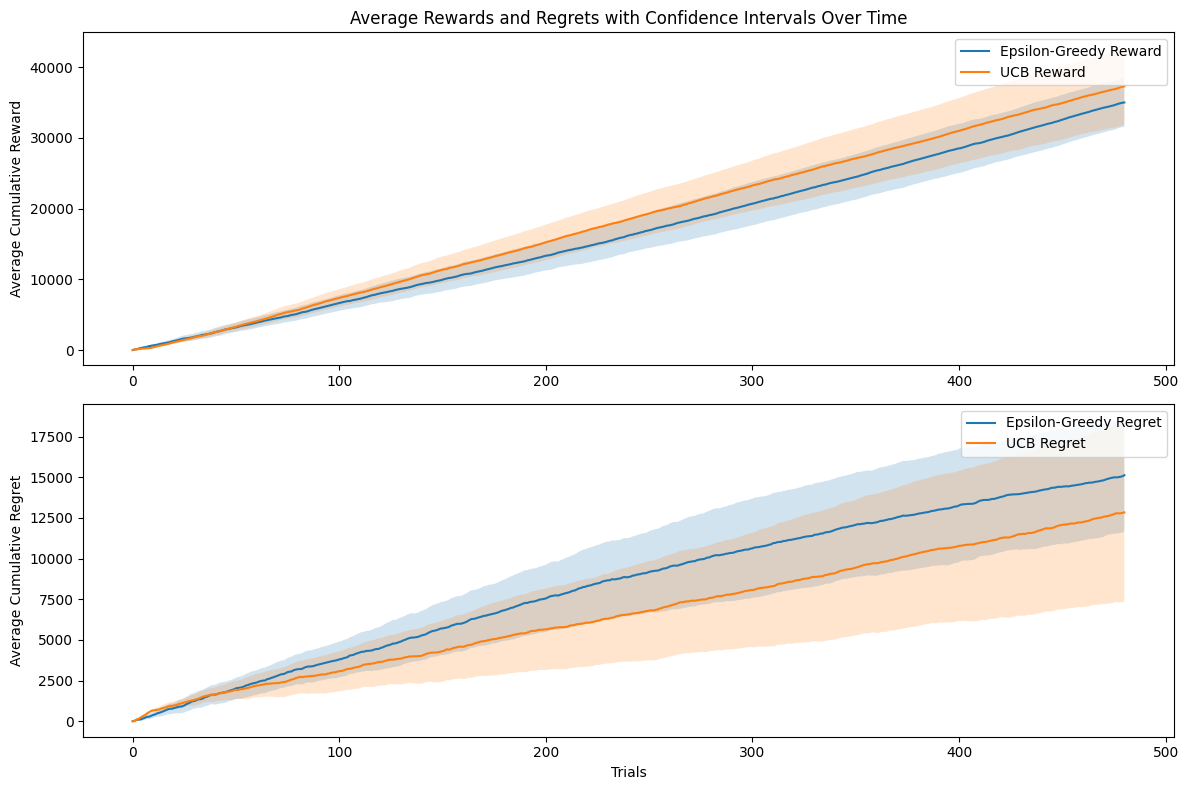

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming the existence of egreedy_alg and UCB_alg functions and the structure of probabilities

num_agents = 10
num_trials = 480
probabilities = [(0.8,0.7,27,2,80),(0.3,0.7,27,14,80),(0.5,0.7,27,10,80),
                 (0.5,0.5,26,2,60),(0.5,0.5,26,14,60),(0.6,0.5,26,10,60),
                 (0.2,0.3,25,2,30),(0.7,0.3,25,14,30),(0.8,0.3,25,10,30)]
epsilon = 0.1
max_reward_per_pull = 104.4

# Storing rewards and regrets for each agent
egreedy_rewards_all = []
ucb_rewards_all = []
egreedy_regrets_all = []
ucb_regrets_all = []

for agent in range(num_agents):
    egreedy = egreedy_alg(probabilities, epsilon)
    ucb = UCB_alg(probabilities)

    egreedy_rewards = [0]
    ucb_rewards = [0]
    optimal_rewards = [0]

    egreedy_regrets = [0]
    ucb_regrets = [0]

    for trial in range(num_trials):
        # Update optimal rewards
        optimal_rewards.append(optimal_rewards[-1] + max_reward_per_pull)

        # Epsilon-Greedy
        _, reward = egreedy.run(1)[0]
        egreedy_rewards.append(egreedy_rewards[-1] + reward)
        egreedy_regrets.append(optimal_rewards[-1] - egreedy_rewards[-1])

        # UCB
        _, reward = ucb.run(1)[0]
        ucb_rewards.append(ucb_rewards[-1] + reward)
        ucb_regrets.append(optimal_rewards[-1] - ucb_rewards[-1])

    # Store the results for this agent
    egreedy_rewards_all.append(egreedy_rewards)
    ucb_rewards_all.append(ucb_rewards)
    egreedy_regrets_all.append(egreedy_regrets)
    ucb_regrets_all.append(ucb_regrets)

# Function to calculate the mean and confidence intervals
def calculate_confidence_intervals(data):
    # Calculate mean and standard deviation
    mean_data = np.mean(data, axis=0)
    std_data = np.std(data, axis=0)

    # Calculate standard error and confidence intervals (95% confidence)
    stderr = std_data / np.sqrt(num_agents)
    confidence_intervals = 1.96 * stderr

    return mean_data, mean_data - confidence_intervals, mean_data + confidence_intervals

# Calculate confidence intervals for rewards and regrets for Epsilon-Greedy
egreedy_rewards_mean, egreedy_rewards_lower, egreedy_rewards_upper = calculate_confidence_intervals(egreedy_rewards_all)
egreedy_regrets_mean, egreedy_regrets_lower, egreedy_regrets_upper = calculate_confidence_intervals(egreedy_regrets_all)

# Calculate confidence intervals for rewards and regrets for UCB
ucb_rewards_mean, ucb_rewards_lower, ucb_rewards_upper = calculate_confidence_intervals(ucb_rewards_all)
ucb_regrets_mean, ucb_regrets_lower, ucb_regrets_upper = calculate_confidence_intervals(ucb_regrets_all)

# Plotting
plt.figure(figsize=(12, 8))

# Plotting Rewards with Confidence Intervals
plt.subplot(2, 1, 1)
# Epsilon-Greedy Rewards with Confidence Intervals
plt.plot(egreedy_rewards_mean, label='Epsilon-Greedy Reward')
plt.fill_between(range(num_trials + 1), egreedy_rewards_lower, egreedy_rewards_upper, alpha=0.2)
# UCB Rewards with Confidence Intervals
plt.plot(ucb_rewards_mean, label='UCB Reward')
plt.fill_between(range(num_trials + 1), ucb_rewards_lower, ucb_rewards_upper, alpha=0.2)
plt.title('Average Rewards and Regrets with Confidence Intervals Over Time')
plt.ylabel('Average Cumulative Reward')
plt.legend()

# Plotting Regrets with Confidence Intervals
plt.subplot(2, 1, 2)
# Epsilon-Greedy Regrets with Confidence Intervals
plt.plot(egreedy_regrets_mean, label='Epsilon-Greedy Regret')
plt.fill_between(range(num_trials + 1), egreedy_regrets_lower, egreedy_regrets_upper, alpha=0.2)
# UCB Regrets with Confidence Intervals
plt.plot(ucb_regrets_mean, label='UCB Regret')
plt.fill_between(range(num_trials + 1), ucb_regrets_lower, ucb_regrets_upper, alpha=0.2)
plt.xlabel('Trials')
plt.ylabel('Average Cumulative Regret')
plt.legend()

plt.tight_layout()
plt.show()
